# Title：ヒロシマmapping

description: 広島県のメッシュを利用し、時間経過による人口密度と観光客数の変化を可視化する。主に戦後の時間の経過と共に、広島の街がどう変化していったのかを人口密度と観光客数の変化のデータを使いながら比較する。

In [1]:
# hiroshima map
import geopandas as gpd
import pandas as pd
import contextily as ctx
import plotly.express as px
import contextily as cx
import numpy as np
import matplotlib.pyplot as plt

# set font
import matplotlib as mpl

# for Mac
mpl.rc('font',family='Hiragino Maru Gothic Pro')

# for PC
# mpl.rc('font',family='MS Gothic')


In [3]:
# 空間データなので geopandas (gpd) でインポート

hiroshimamesh1 = gpd.read_file('SDDSWS5132')
hiroshimamesh2 = gpd.read_file('SDDSWS5133')
hiroshimamesh3 = gpd.read_file('SDDSWS5232')
hiroshimamesh4 = gpd.read_file('SDDSWS5233')


In [5]:
# combine all four mesh shapes
hiroshimamesh = gpd.pd.concat([hiroshimamesh1,hiroshimamesh2,hiroshimamesh3,hiroshimamesh4])

<Axes: >

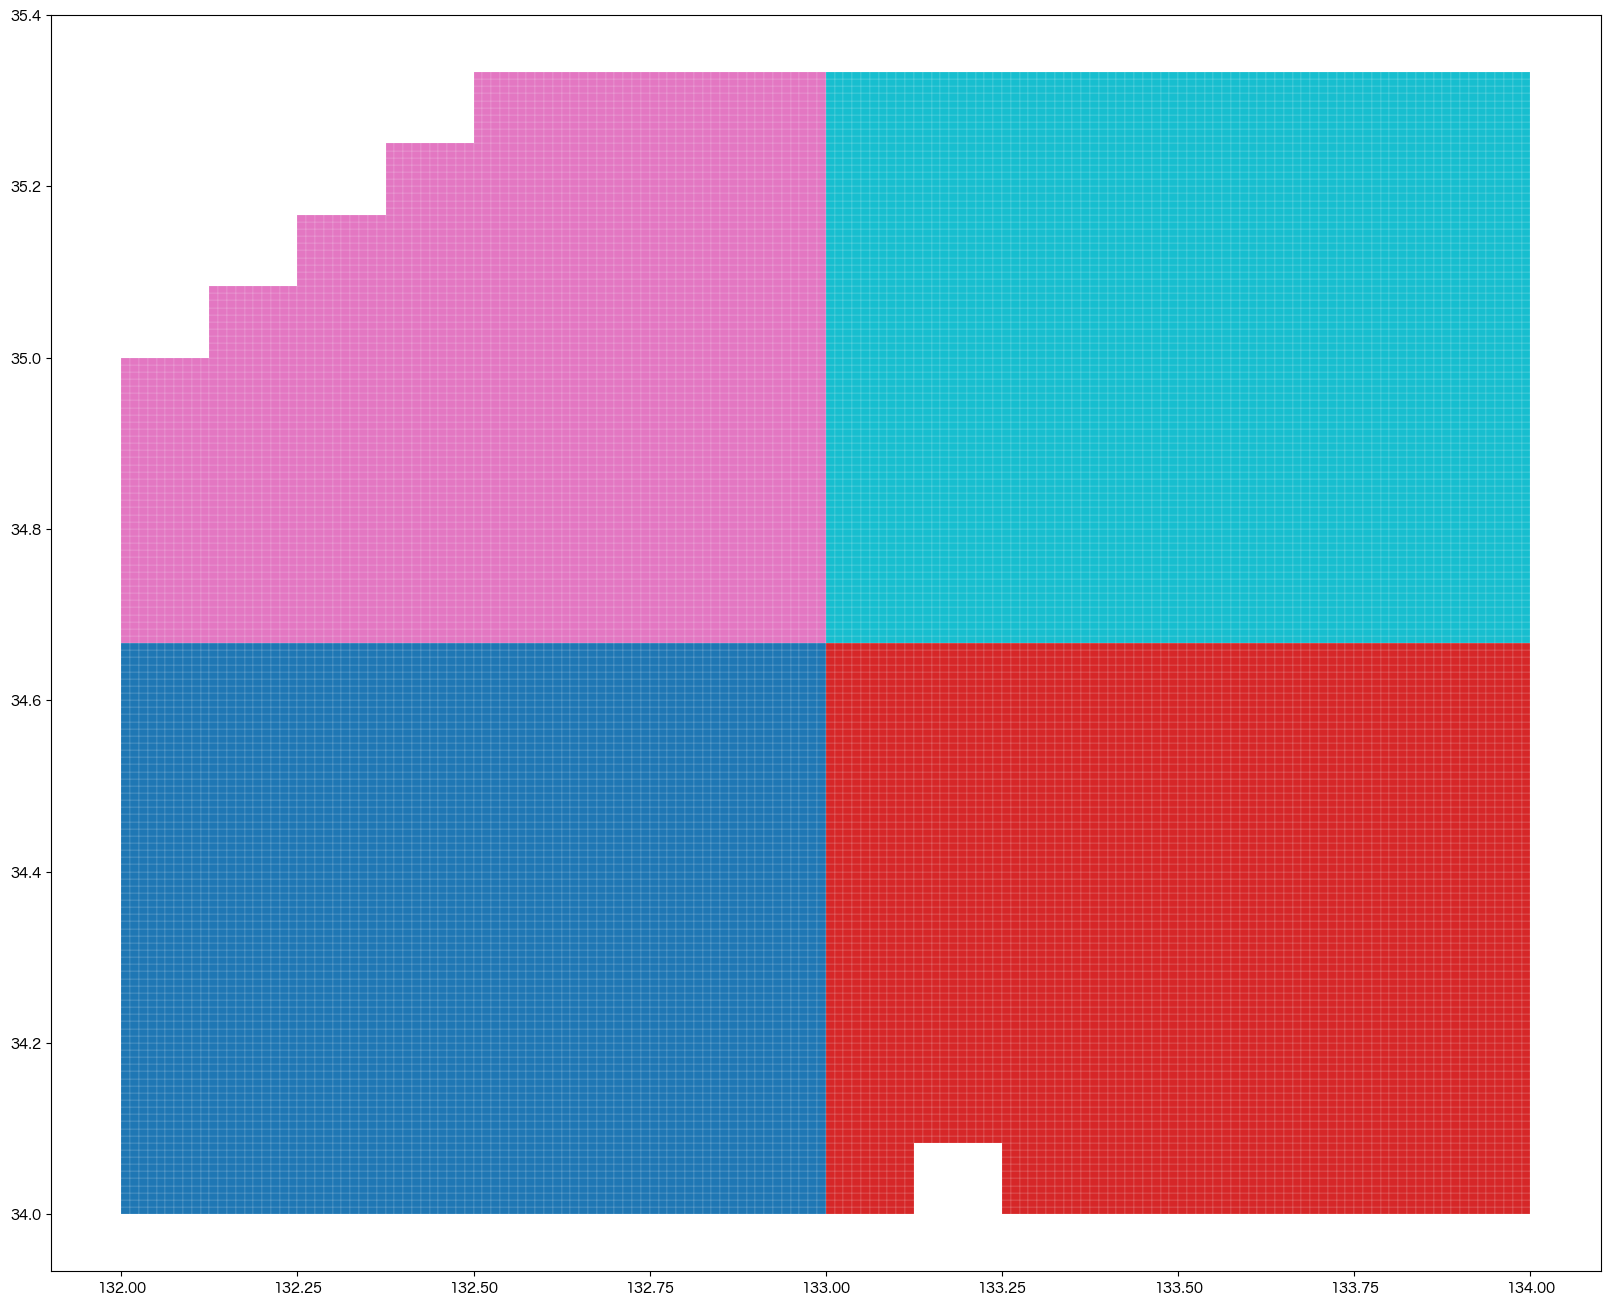

In [6]:
# quick plot
hiroshimamesh.plot(figsize=(20,20),edgecolor='white',linewidth=0.1,column='MESH1_ID')

In [7]:
hiroshimamesh.head()

,KEY_CODE,MESH1_ID,MESH2_ID,MESH3_ID,OBJ_ID,geometry
0,51320000,5132,00,00,1,"POLYGON ((132.01250 34.00000, 132.00000 34.000..."
1,51320001,5132,00,01,2,"POLYGON ((132.02500 34.00000, 132.01250 34.000..."
2,51320002,5132,00,02,3,"POLYGON ((132.03750 34.00000, 132.02500 34.000..."
3,51320003,5132,00,03,4,"POLYGON ((132.05000 34.00000, 132.03750 34.000..."
4,51320004,5132,00,04,5,"POLYGON ((132.06250 34.00000, 132.05000 34.000..."


In [9]:
# csvデータなので pandas (pd) でインポート
# 文字化け予防のために encoding='cp932' 
hiroshimadata1 = pd.read_csv('hiroshima.5132.txt', encoding='cp932')
hiroshimadata2 = pd.read_csv('hiroshima.5133.txt', encoding='cp932')
hiroshimadata3= pd.read_csv('hiroshima.5232.txt', encoding='cp932')
hiroshimadata4 = pd.read_csv('hiroshima.5233.txt', encoding='cp932')

In [10]:
# check data
hiroshimadata4.head()

,KEY_CODE,HTKSYORI,HTKSAKI,GASSAN,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
0,NaN,NaN,NaN,NaN,人口（総数）,人口（総数） 男,人口（総数） 女,０～１４歳人口 総数,０～１４歳人口 男,０～１４歳人口 女,...,６人世帯数 一般世帯数,７人以上世帯数 一般世帯数,親族のみの世帯数 一般世帯数,核家族世帯数 一般世帯数,核家族以外の世帯数 一般世帯数,６歳未満世帯員のいる世帯数 一般世帯数,６５歳以上世帯員のいる世帯数 一般世帯数,世帯主の年齢が２０～２９歳の１人世帯数 一般世帯数,高齢単身世帯数 一般世帯数,高齢夫婦世帯数 一般世帯数
1,52330002.0,1.0,NaN,52330012,21,11,10,1,0,1,...,1,0,7,6,1,0,7,0,2,3
2,52330003.0,0.0,NaN,NaN,44,25,19,11,8,3,...,0,2,11,5,6,2,9,0,0,2
3,52330004.0,1.0,NaN,52330005,18,9,9,0,0,0,...,0,0,7,7,0,0,8,0,2,3
4,52330005.0,2.0,52330004.0,NaN,2,2,0,*,*,*,...,*,*,*,*,*,*,*,*,*,*


In [11]:
# ４つのテーブルから１行目を削除
hiroshimadata1 = hiroshimadata1[1:]

In [12]:
# ４つのテーブルから１行目を削除
hiroshimadata2 = hiroshimadata2[1:]
hiroshimadata3 = hiroshimadata3[1:]
hiroshimadata4 = hiroshimadata4[1:]

In [14]:
# ４つのテーブルから「＊」を非数に置き換える
hiroshimadata1 = hiroshimadata1.replace('*','0')
hiroshimadata2 = hiroshimadata2.replace('*','0')
hiroshimadata3 = hiroshimadata3.replace('*','0')
hiroshimadata4 = hiroshimadata4.replace('*','0')

In [15]:
# ４つのテーブルから「＊」を非数に置き換える
hiroshimadata1

,KEY_CODE,HTKSYORI,HTKSAKI,GASSAN,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
1,51320000.0,0.0,NaN,NaN,158,78,80,11,6,5,...,3,0,48,39,9,4,51,0,12,17
2,51320001.0,0.0,NaN,NaN,36,22,14,0,0,0,...,0,0,12,11,1,0,11,0,3,4
3,51320002.0,0.0,NaN,NaN,18,7,11,0,0,0,...,0,0,7,6,1,0,8,0,2,3
4,51320003.0,0.0,NaN,NaN,54,33,21,5,3,2,...,1,0,13,10,3,1,13,0,4,2
5,51320004.0,2.0,51320014.0,NaN,4,1,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3106,51327794.0,0.0,NaN,NaN,52,21,31,6,1,5,...,0,2,16,14,2,2,22,0,6,11
3107,51327795.0,1.0,NaN,51327784,16,5,11,4,2,2,...,1,0,5,3,2,2,4,4,0,2
3108,51327796.0,0.0,NaN,NaN,56,25,31,1,0,1,...,0,0,20,17,3,1,20,0,4,9
3109,51327797.0,0.0,NaN,NaN,21,11,10,3,3,0,...,0,1,5,2,3,0,6,0,1,1


In [16]:
hiroshimadata = pd.concat([hiroshimadata1,hiroshimadata2,hiroshimadata3,hiroshimadata4])

In [17]:
# check data info
hiroshimadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13539 entries, 1 to 3988
Data columns (total 54 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KEY_CODE    13539 non-null  float64
 1   HTKSYORI    13539 non-null  float64
 2   HTKSAKI     2776 non-null   float64
 3   GASSAN      2084 non-null   object 
 4   T001100001  13539 non-null  object 
 5   T001100002  13539 non-null  object 
 6   T001100003  13539 non-null  object 
 7   T001100004  13539 non-null  object 
 8   T001100005  13539 non-null  object 
 9   T001100006  13539 non-null  object 
 10  T001100007  13539 non-null  object 
 11  T001100008  13539 non-null  object 
 12  T001100009  13539 non-null  object 
 13  T001100010  13539 non-null  object 
 14  T001100011  13539 non-null  object 
 15  T001100012  13539 non-null  object 
 16  T001100013  13539 non-null  object 
 17  T001100014  13539 non-null  object 
 18  T001100015  13539 non-null  object 
 19  T001100016  13539 non-null  obj

In [18]:
# まずはカラムをアウトプット
hiroshimadata.columns

Index(['KEY_CODE', 'HTKSYORI', 'HTKSAKI', 'GASSAN', 'T001100001', 'T001100002',
       'T001100003', 'T001100004', 'T001100005', 'T001100006', 'T001100007',
       'T001100008', 'T001100009', 'T001100010', 'T001100011', 'T001100012',
       'T001100013', 'T001100014', 'T001100015', 'T001100016', 'T001100017',
       'T001100018', 'T001100019', 'T001100020', 'T001100021', 'T001100022',
       'T001100023', 'T001100024', 'T001100025', 'T001100026', 'T001100027',
       'T001100028', 'T001100029', 'T001100030', 'T001100031', 'T001100032',
       'T001100033', 'T001100034', 'T001100035', 'T001100036', 'T001100037',
       'T001100038', 'T001100039', 'T001100040', 'T001100041', 'T001100042',
       'T001100043', 'T001100044', 'T001100045', 'T001100046', 'T001100047',
       'T001100048', 'T001100049', 'T001100050'],
      dtype='object')

In [19]:
# 4番目以降をアウトプット
hiroshimadata.columns[4:]

Index(['T001100001', 'T001100002', 'T001100003', 'T001100004', 'T001100005',
       'T001100006', 'T001100007', 'T001100008', 'T001100009', 'T001100010',
       'T001100011', 'T001100012', 'T001100013', 'T001100014', 'T001100015',
       'T001100016', 'T001100017', 'T001100018', 'T001100019', 'T001100020',
       'T001100021', 'T001100022', 'T001100023', 'T001100024', 'T001100025',
       'T001100026', 'T001100027', 'T001100028', 'T001100029', 'T001100030',
       'T001100031', 'T001100032', 'T001100033', 'T001100034', 'T001100035',
       'T001100036', 'T001100037', 'T001100038', 'T001100039', 'T001100040',
       'T001100041', 'T001100042', 'T001100043', 'T001100044', 'T001100045',
       'T001100046', 'T001100047', 'T001100048', 'T001100049', 'T001100050'],
      dtype='object')

In [20]:
# このカラムをテーブル形式で見る
hiroshimadata[hiroshimadata.columns[4:]]

,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,T001100007,T001100008,T001100009,T001100010,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
1,158,78,80,11,6,5,147,72,75,71,...,3,0,48,39,9,4,51,0,12,17
2,36,22,14,0,0,0,36,22,14,20,...,0,0,12,11,1,0,11,0,3,4
3,18,7,11,0,0,0,18,7,11,5,...,0,0,7,6,1,0,8,0,2,3
4,54,33,21,5,3,2,49,30,19,29,...,1,0,13,10,3,1,13,0,4,2
5,4,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3984,15,6,9,0,0,0,21,11,10,7,...,1,0,3,1,2,0,9,0,6,1
3985,4,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3986,28,16,12,3,2,1,25,14,11,10,...,0,1,7,5,2,1,9,0,2,3
3987,25,11,14,0,0,0,35,16,19,16,...,1,0,9,7,2,0,14,0,7,4


In [21]:
# objectからfloatに変換
hiroshimadata[hiroshimadata.columns[4:]].astype(float)

,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,T001100007,T001100008,T001100009,T001100010,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
1,158.0,78.0,80.0,11.0,6.0,5.0,147.0,72.0,75.0,71.0,...,3.0,0.0,48.0,39.0,9.0,4.0,51.0,0.0,12.0,17.0
2,36.0,22.0,14.0,0.0,0.0,0.0,36.0,22.0,14.0,20.0,...,0.0,0.0,12.0,11.0,1.0,0.0,11.0,0.0,3.0,4.0
3,18.0,7.0,11.0,0.0,0.0,0.0,18.0,7.0,11.0,5.0,...,0.0,0.0,7.0,6.0,1.0,0.0,8.0,0.0,2.0,3.0
4,54.0,33.0,21.0,5.0,3.0,2.0,49.0,30.0,19.0,29.0,...,1.0,0.0,13.0,10.0,3.0,1.0,13.0,0.0,4.0,2.0
5,4.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3984,15.0,6.0,9.0,0.0,0.0,0.0,21.0,11.0,10.0,7.0,...,1.0,0.0,3.0,1.0,2.0,0.0,9.0,0.0,6.0,1.0
3985,4.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3986,28.0,16.0,12.0,3.0,2.0,1.0,25.0,14.0,11.0,10.0,...,0.0,1.0,7.0,5.0,2.0,1.0,9.0,0.0,2.0,3.0
3987,25.0,11.0,14.0,0.0,0.0,0.0,35.0,16.0,19.0,16.0,...,1.0,0.0,9.0,7.0,2.0,0.0,14.0,0.0,7.0,4.0


In [22]:
# 元のデータを入れ替える
hiroshimadata[hiroshimadata.columns[4:]]=hiroshimadata[hiroshimadata.columns[4:]].astype(float)

In [23]:
# check!
hiroshimadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13539 entries, 1 to 3988
Data columns (total 54 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KEY_CODE    13539 non-null  float64
 1   HTKSYORI    13539 non-null  float64
 2   HTKSAKI     2776 non-null   float64
 3   GASSAN      2084 non-null   object 
 4   T001100001  13539 non-null  float64
 5   T001100002  13539 non-null  float64
 6   T001100003  13539 non-null  float64
 7   T001100004  13539 non-null  float64
 8   T001100005  13539 non-null  float64
 9   T001100006  13539 non-null  float64
 10  T001100007  13539 non-null  float64
 11  T001100008  13539 non-null  float64
 12  T001100009  13539 non-null  float64
 13  T001100010  13539 non-null  float64
 14  T001100011  13539 non-null  float64
 15  T001100012  13539 non-null  float64
 16  T001100013  13539 non-null  float64
 17  T001100014  13539 non-null  float64
 18  T001100015  13539 non-null  float64
 19  T001100016  13539 non-null  flo

In [24]:
# KEY_CODEをfloatに
hiroshimamesh['KEY_CODE']=hiroshimamesh['KEY_CODE'].astype(float)

In [25]:
# merge the data
hiroshimamesh = hiroshimamesh.merge(hiroshimadata, on='KEY_CODE')

In [26]:
# check!
hiroshimamesh.sample(5)

,KEY_CODE,MESH1_ID,MESH2_ID,MESH3_ID,OBJ_ID,geometry,HTKSYORI,HTKSAKI,GASSAN,T001100001,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
509,51322097.0,5132,20,97,1698,"POLYGON ((132.10000 34.24167, 132.08750 34.241...",0.0,NaN,NaN,40.0,...,0.0,0.0,4.0,4.0,0.0,0.0,6.0,0.0,2.0,3.0
6136,51337498.0,5133,74,98,5999,"POLYGON ((133.61250 34.65833, 133.60000 34.658...",1.0,NaN,51337499,25.0,...,0.0,0.0,8.0,6.0,2.0,0.0,13.0,0.0,6.0,3.0
8240,52323658.0,5232,36,58,3059,"POLYGON ((132.86250 34.95833, 132.85000 34.958...",2.0,52323647.0,NaN,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11450,52333060.0,5233,30,60,2461,"POLYGON ((133.01250 34.96667, 133.00000 34.966...",2.0,52333061.0,NaN,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6056,51337409.0,5133,74,09,5910,"POLYGON ((133.62500 34.58333, 133.61250 34.583...",0.0,NaN,NaN,165.0,...,0.0,0.0,27.0,23.0,4.0,1.0,30.0,1.0,9.0,11.0


In [27]:
# reproject to 3857 (web mercator)
hiroshimamesh = hiroshimamesh.to_crs(3857)

In [30]:
hiroshimamesh.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 13539 entries, 0 to 13538
Data columns (total 59 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   KEY_CODE    13539 non-null  float64 
 1   MESH1_ID    13539 non-null  object  
 2   MESH2_ID    13539 non-null  object  
 3   MESH3_ID    13539 non-null  object  
 4   OBJ_ID      13539 non-null  int64   
 5   geometry    13539 non-null  geometry
 6   HTKSYORI    13539 non-null  float64 
 7   HTKSAKI     2776 non-null   float64 
 8   GASSAN      2084 non-null   object  
 9   T001100001  13539 non-null  float64 
 10  T001100002  13539 non-null  float64 
 11  T001100003  13539 non-null  float64 
 12  T001100004  13539 non-null  float64 
 13  T001100005  13539 non-null  float64 
 14  T001100006  13539 non-null  float64 
 15  T001100007  13539 non-null  float64 
 16  T001100008  13539 non-null  float64 
 17  T001100009  13539 non-null  float64 
 18  T001100010  13539 non-null  float64 
 

<Axes: >

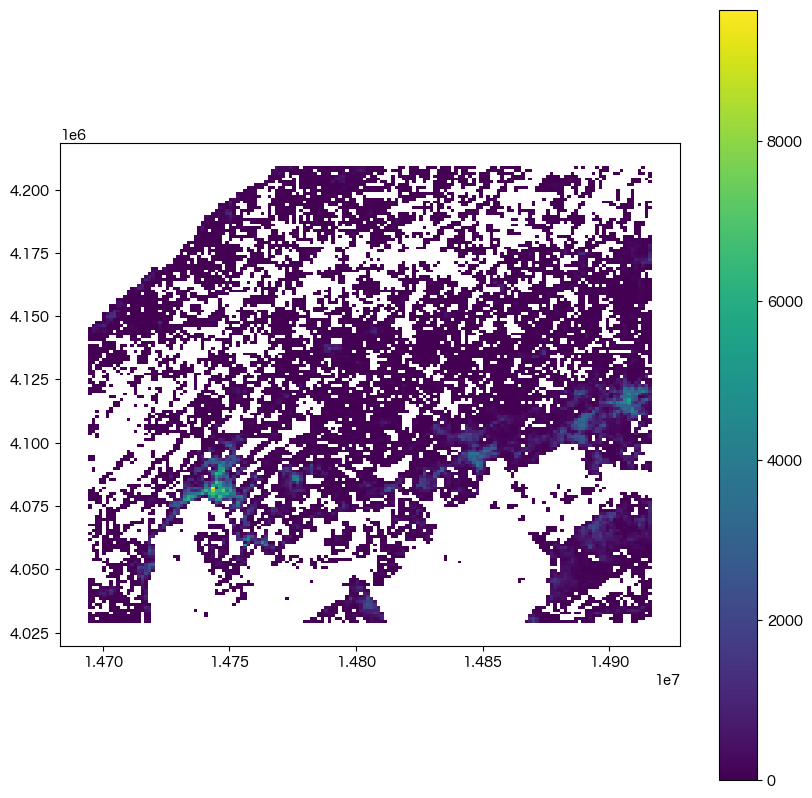

In [35]:
# make a quick plot
hiroshimamesh.plot(
    figsize=(10,10),
    legend=True,
    column='T001100002')